In [5]:
import pandas as pd
import random
import re

# Load the dataset
file_path = 'marathi.csv'
data = pd.read_csv(file_path)

# Randomly select 10,000 rows from the dataset
subset_data = data.sample(n=10000, random_state=42)

# Basic Text Normalization function
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = text.replace('?', '').replace('!', '').replace('.', '').replace(',', '')
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])
    text = re.sub(r'[^\u0900-\u097F ]', '', text)  # Keep only Marathi (Devanagari) characters
    return text

# Apply normalization to the 'Sentence' column
subset_data['Sentence'] = subset_data['Sentence'].apply(normalize_text)

# Display the first 5 rows after normalization
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251  माझं ध्वंसकता उद्वेगाग्निवाहक आहे आणि ते नेहमी...  Negative   Anger
124137  मेहनत हे शब्दांतिल प्रेरणा सुखद भावनेतून प्रसन...   Neutral   Peace
62810   माझं आतंरिक अंतर्यामी आहे आणि ते नेहमी एकनिष्ठ...  Positive    Love
65425   जेव्हा एकनिष्ठता महत्त्वपूर्ण होणे तेव्हा जग अ...  Positive    Love
30074   जर आनंदाची कवाडे प्रभाव पाडणे वास्तविक आहे तर ...  Positive     Joy


In [6]:
# Define a list of 5 custom Gujarati stopwords
marathi_stopwords = set(["आहे", "आहेस", "आहेत", "होते", "होतेस", "होतेत", "झालं", "झाली", "झाले", "हे", "तो", "ती", "ते", "या", "या", "मी", "आम्ही", "तू", "तुम्ही", "आम्हाला", "तुला", "तुम्हाला", "माझं", "तुझं", "तिचं", "त्याचं", "त्यांचं", "त्यांचा", "तिचा", "तिचं", "त्यात", "त्यावर", "त्याच्या", "यांच्या", "हा", "ह्या", "त्या", "मी", "आम्हाला", "आहे", "होते", "नाही", "कधी", "कुठे", "का", "जेव्हा", "जे", "कोण", "कसा", "कसे", "किती", "इथे", "तिथे", "आता", "पुन्हा", "म्हणून", "किंवा", "पण", "मात्र", "म्हणूनच", "जर", "तर", "आणि", "बरोबर", "नाहीतर", "शक्यतो", "सगळे", "संपूर्ण", "काही", "कोणता", "कोणती", "कोणते", "काय", "कुठला", "कुठेही", "कुणीही", "काहीच", "काहीही", "सर्व", "तसेच", "म्हणूनच", "आता", "पुढे", "मागे", "नेहमी", "थोडा", "खूप", "मोठा", "छोटा", "साधारण", "पूर्ण", "नंतर"
])
# Function to remove stopwords
def remove_stopwords(text, stopwords):
    return ' '.join([word for word in text.split() if word not in marathi_stopwords])

# Apply stopword removal
subset_data['Sentence'] = subset_data['Sentence'].apply(lambda x: remove_stopwords(x, marathi_stopwords))

# Display the first 5 rows after stopword removal
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251   ध्वंसकता उद्वेगाग्निवाहक क्रोधाने धमकाववणे राहतं  Negative   Anger
124137  मेहनत शब्दांतिल प्रेरणा सुखद भावनेतून प्रसन्नत...   Neutral   Peace
62810                 आतंरिक अंतर्यामी एकनिष्ठ होणे राहतं  Positive    Love
65425   एकनिष्ठता महत्त्वपूर्ण होणे तेव्हा जग अद्वैतमय...  Positive    Love
30074   आनंदाची कवाडे प्रभाव पाडणे वास्तविक स्फूर्तीची...  Positive     Joy


In [7]:
# Filter sentences that are too short (less than 5 words)
subset_data = subset_data[subset_data['Sentence'].apply(lambda x: len(x.split()) >= 5)]

# Display the remaining dataset
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251   ध्वंसकता उद्वेगाग्निवाहक क्रोधाने धमकाववणे राहतं  Negative   Anger
124137  मेहनत शब्दांतिल प्रेरणा सुखद भावनेतून प्रसन्नत...   Neutral   Peace
62810                 आतंरिक अंतर्यामी एकनिष्ठ होणे राहतं  Positive    Love
65425   एकनिष्ठता महत्त्वपूर्ण होणे तेव्हा जग अद्वैतमय...  Positive    Love
30074   आनंदाची कवाडे प्रभाव पाडणे वास्तविक स्फूर्तीची...  Positive     Joy


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the 'Sentence' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(subset_data['Sentence'])

# Encoding the labels for Sentiment and Emotion
y_sentiment = subset_data['Sentiment']
y_emotion = subset_data['Emotion']

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_sentiment_train, y_sentiment_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_sentiment, y_emotion, test_size=0.2, random_state=42)

# Display the shapes of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (7100, 1746)
Test data shape: (1775, 1746)


Sentiment Accuracy: 0.9025352112676056
Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92       607
     Neutral       0.90      0.89      0.89       611
    Positive       0.91      0.87      0.89       557

    accuracy                           0.90      1775
   macro avg       0.90      0.90      0.90      1775
weighted avg       0.90      0.90      0.90      1775

Sentiment Confusion Matrix:
[[578  22   7]
 [ 29 542  40]
 [ 36  39 482]]


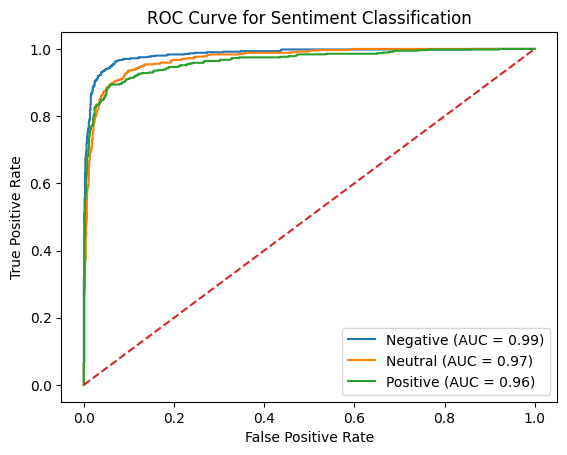

Emotion Accuracy: 0.7729577464788733
Emotion Classification Report:
              precision    recall  f1-score   support

  Acceptance       0.81      0.86      0.83       208
       Anger       0.85      0.95      0.90       202
        Calm       0.76      0.78      0.77       172
       Grief       0.52      0.45      0.48       217
        Hope       0.76      0.89      0.82       183
         Joy       0.86      0.78      0.82       190
        Love       0.90      0.94      0.92       184
       Peace       0.95      0.91      0.93       231
     Sadness       0.47      0.41      0.44       188

    accuracy                           0.77      1775
   macro avg       0.76      0.77      0.77      1775
weighted avg       0.76      0.77      0.77      1775

Emotion Confusion Matrix:
[[178   3   7   2   8   4   6   0   0]
 [  0 192   0   3   3   1   0   1   2]
 [  9   7 135   1  12   3   1   2   2]
 [ 10   5   5  97   5   7   5   5  78]
 [  6   3  10   1 162   1   0   0   0]
 [  5 

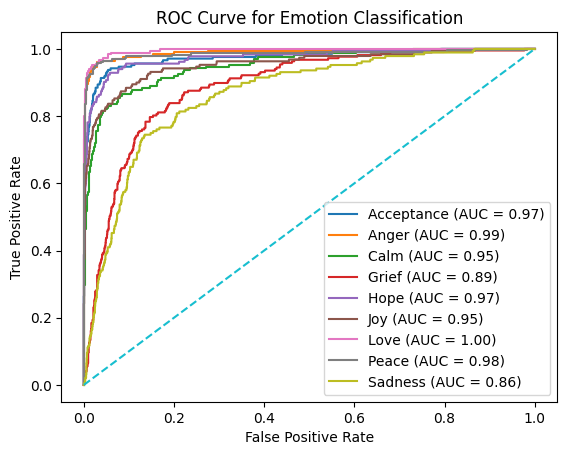

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the ROC curve for multiclass classification
def plot_multiclass_roc(y_true, y_scores, title, classes):
    # Binarize the labels for each class
    y_true_bin = label_binarize(y_true, classes=classes)

    # Plot ROC curve for each class
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        auc = roc_auc_score(y_true_bin[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Train the SVM model for Sentiment classification using OneVsRest strategy
svm_sentiment = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_sentiment.fit(X_train, y_sentiment_train)

# Evaluate the model for sentiment classification
y_sentiment_pred = svm_sentiment.predict(X_test)
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print(f"Sentiment Accuracy: {sentiment_accuracy}")

# Confusion matrix and classification report for sentiment
print("Sentiment Classification Report:")
print(classification_report(y_sentiment_test, y_sentiment_pred))

print("Sentiment Confusion Matrix:")
print(confusion_matrix(y_sentiment_test, y_sentiment_pred))

# ROC and AUC for sentiment
y_sentiment_scores = svm_sentiment.decision_function(X_test)
sentiment_classes = svm_sentiment.classes_
plot_multiclass_roc(y_sentiment_test, y_sentiment_scores, "ROC Curve for Sentiment Classification", sentiment_classes)

# Train the SVM model for Emotion classification using OneVsRest strategy
svm_emotion = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_emotion.fit(X_train, y_emotion_train)

# Evaluate the model for emotion classification
y_emotion_pred = svm_emotion.predict(X_test)
emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
print(f"Emotion Accuracy: {emotion_accuracy}")

# Confusion matrix and classification report for emotion
print("Emotion Classification Report:")
print(classification_report(y_emotion_test, y_emotion_pred))

print("Emotion Confusion Matrix:")
print(confusion_matrix(y_emotion_test, y_emotion_pred))

# ROC and AUC for emotion
y_emotion_scores = svm_emotion.decision_function(X_test)
emotion_classes = svm_emotion.classes_
plot_multiclass_roc(y_emotion_test, y_emotion_scores, "ROC Curve for Emotion Classification", emotion_classes)


In [12]:
# Custom Gujarati sentences and their English translations
custom_sentences_gujarati = ["तुझ्या कटू शब्दांनी मनात धगधगणारा अंगार अजून तीव्र होत चालला आहे",
"तुझं अशा रीतीने दूर जाणं जणू प्रत्येक दिवस थोडा थोडा कमी उजेडाचा होत जातोय",
"सत्य समोर आलं तेव्हा सगळ्या स्वप्नांचा चुराडा झाल्याचं जाणवलं, पण तरीही चालावं लागतं",
"शांततेत बसून वाऱ्याच्या हळुवार स्पर्शात विश्वाचं गूढ हळूहळू उलगडत जातं",
"तुझ्या सहवासात प्रत्येक क्षणाचं अनमोल महत्त्व उमजतं, आणि जग सुंदर भासतं"
]

# English translations
custom_sentences_english = ["Your bitter words have only intensified the smoldering fire within me",
"Your departure in this manner makes it feel like each day grows dimmer and dimmer",
"When the truth came forward, it felt like all dreams shattered, yet the journey must continue",
"Sitting quietly and feeling the gentle touch of the wind, the mysteries of the universe slowly unfold",
"Every moment with you feels precious, and the world seems beautiful in your presence"

]
# Apply the same preprocessing to custom sentences
custom_sentences_preprocessed = [normalize_text(sentence) for sentence in custom_sentences_gujarati]
custom_sentences_preprocessed = [remove_stopwords(sentence, marathi_stopwords) for sentence in custom_sentences_preprocessed]

# Vectorize the custom sentences
custom_sentences_tfidf = tfidf_vectorizer.transform(custom_sentences_preprocessed)

# Predict Sentiment and Emotion using the trained models
custom_sentiment_pred = svm_sentiment.predict(custom_sentences_tfidf)
custom_emotion_pred = svm_emotion.predict(custom_sentences_tfidf)

# Display the results with English translations
for i, sentence in enumerate(custom_sentences_gujarati):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {custom_sentences_english[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_pred[i]}")
    print(f"Predicted Emotion: {custom_emotion_pred[i]}")
    print()


Gujarati Sentence: तुझ्या कटू शब्दांनी मनात धगधगणारा अंगार अजून तीव्र होत चालला आहे
English Translation: Your bitter words have only intensified the smoldering fire within me
Predicted Sentiment: Neutral
Predicted Emotion: Anger

Gujarati Sentence: तुझं अशा रीतीने दूर जाणं जणू प्रत्येक दिवस थोडा थोडा कमी उजेडाचा होत जातोय
English Translation: Your departure in this manner makes it feel like each day grows dimmer and dimmer
Predicted Sentiment: Negative
Predicted Emotion: Grief

Gujarati Sentence: सत्य समोर आलं तेव्हा सगळ्या स्वप्नांचा चुराडा झाल्याचं जाणवलं, पण तरीही चालावं लागतं
English Translation: When the truth came forward, it felt like all dreams shattered, yet the journey must continue
Predicted Sentiment: Neutral
Predicted Emotion: Acceptance

Gujarati Sentence: शांततेत बसून वाऱ्याच्या हळुवार स्पर्शात विश्वाचं गूढ हळूहळू उलगडत जातं
English Translation: Sitting quietly and feeling the gentle touch of the wind, the mysteries of the universe slowly unfold
Predicted Sentiment: Neut

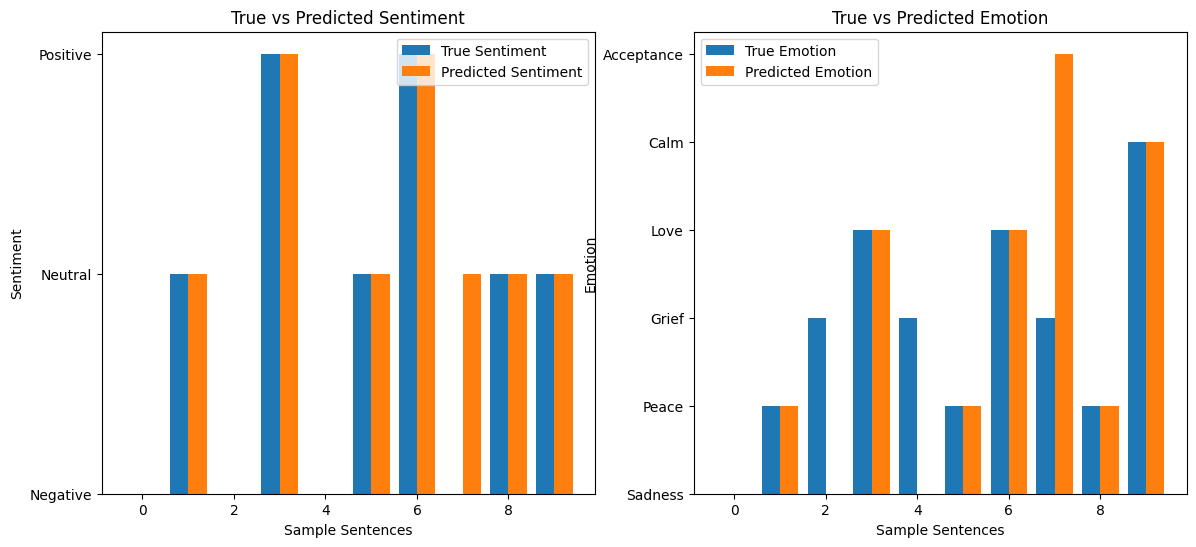

In [13]:
import numpy as np

# Take 10 random sentences from the test set
test_sample = subset_data.sample(10, random_state=42)
X_sample = tfidf_vectorizer.transform(test_sample['Sentence'])
y_sentiment_sample = test_sample['Sentiment']
y_emotion_sample = test_sample['Emotion']

# Predict sentiment and emotion for the sample
y_sentiment_pred_sample = svm_sentiment.predict(X_sample)
y_emotion_pred_sample = svm_emotion.predict(X_sample)

# Plotting the bar graph for sentiment and emotion
sentiments = np.arange(10)

plt.figure(figsize=(14, 6))

# Bar graph for Sentiment
plt.subplot(1, 2, 1)
plt.bar(sentiments - 0.2, y_sentiment_sample, 0.4, label='True Sentiment')
plt.bar(sentiments + 0.2, y_sentiment_pred_sample, 0.4, label='Predicted Sentiment')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment')
plt.legend()

# Bar graph for Emotion
plt.subplot(1, 2, 2)
plt.bar(sentiments - 0.2, y_emotion_sample, 0.4, label='True Emotion')
plt.bar(sentiments + 0.2, y_emotion_pred_sample, 0.4, label='Predicted Emotion')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion')
plt.legend()

plt.show()


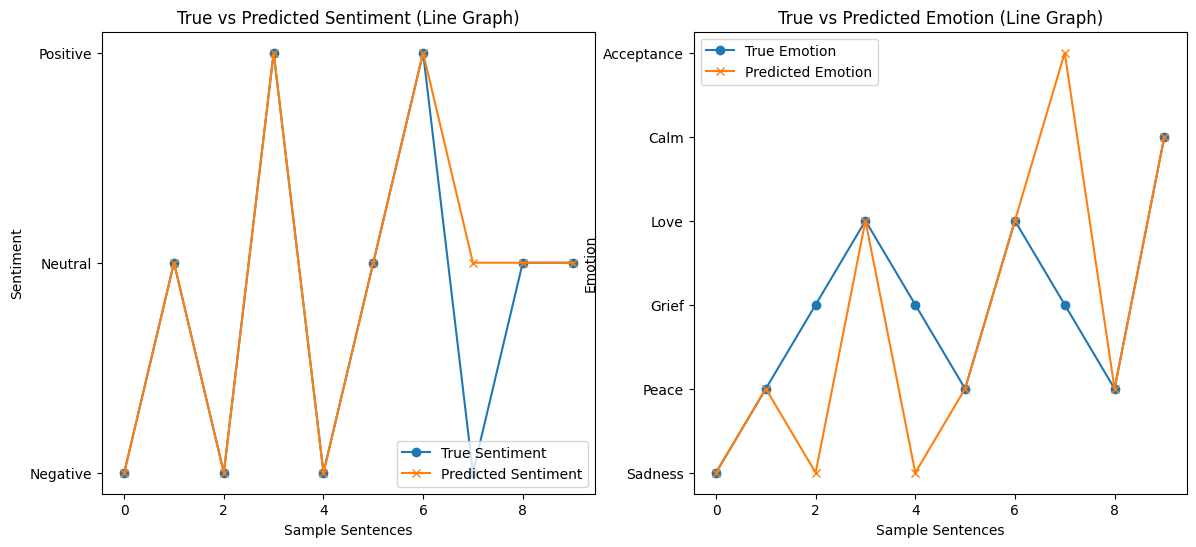

In [14]:
# Plotting the line graph for true vs predicted sentiment and emotion
plt.figure(figsize=(14, 6))

# Line graph for Sentiment
plt.subplot(1, 2, 1)
plt.plot(sentiments, y_sentiment_sample, label='True Sentiment', marker='o')
plt.plot(sentiments, y_sentiment_pred_sample, label='Predicted Sentiment', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment (Line Graph)')
plt.legend()

# Line graph for Emotion
plt.subplot(1, 2, 2)
plt.plot(sentiments, y_emotion_sample, label='True Emotion', marker='o')
plt.plot(sentiments, y_emotion_pred_sample, label='Predicted Emotion', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion (Line Graph)')
plt.legend()

plt.show()
